# BP Reservoir Permeability -- Measurements on rock samples for rock permeability

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0098300417301917-gr1a.jpg" alt="drawing" width="400"/>
<center>Real-world example from rock thin-section <a href="https://doi.org/10.1016/j.cageo.2017.02.014">(Saxena et al. 2017)</a> . The blue stain fills porous space.</center>

 

**Introduction**

The data set contains measurements on hydrocarbon reservoir rock samples. The aim of this study is predicting rock permeability from various characteristics of pores measurable in thin section. Despite the data set is dating back to 1995, making accurate predictions of permeability remains a difficult task and is continuously studied (for example [Saxena et al. 2017](https://doi.org/10.1016/j.cageo.2017.02.014)). Permeability is a measure how well a fluid (in that case crude oil) or gas can flow through a rock. Thus, permeability has large influence on how well a reservoir can be drained. Porosity alone is not necessarily a good predictor for permeability if they are not well connected. Typically, permeability is determined in the laboratory on rock samples by pushing a fluid through the sample. The data set contains a total 48 samples (12 rock cores, on each 4 thin-section measurements for variance within in a core) with the features: 1) Area of pores, 2) Perimeter of pores, 3) Shape of pores (perimeter/sqrt(area)). The target value is Permeability in milli Darcy (mD) and is sought to be predicted with a regression model.


**The Business Case**

Permeability is perfectly measured only in the laboratory on small samples that are costly to obtain and take a long time to produce. Predicting permeability from cheaper measurements in place will make the reservoir characterization process more efficient.


**Description of Data Set**

Twelve core samples from petroleum reservoirs were sampled by 4 cross-sections. Each core sample was measured for permeability, and each cross-section has total area of pores, total perimeter of pores, and shape. 

A data frame with 48 rows and 4 numeric columns.
1. "area" area of pores space, in pixels out of 256 by 256
2. "peri" perimeter of pores in pixels
3. "shape" perimeter/sqrt(area)
4. "perm" permeability in milli-Darcies 

More: https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/rock.html


**Data source**

The dataset is made widely available in an R library called ‘datasets’.
Courtesy of BP Research and University of Oxford.
The data were collected and kindly made  available by R. Katz of the Department of Statistics at the University of Oxford.
Katz, R. (1995) Spatial Analysis of Pore Images. D.Phil. thesis, Department of Statistics, University of Oxford.


**Data host**

https://vincentarelbundock.github.io/Rdatasets/






<img src="https://qph.fs.quoracdn.net/main-qimg-0512dcb3a03a41e2bd74bc2ac7119362" alt="drawing" width="500"/>
<center>Text book cartoon of porosity.</center>






## Prerequisites for Model deployment on IBM Cloud

In [1]:
import keras
print('Current:\t', keras.__version__)
print('Expected:\t 2.1.3')

Using TensorFlow backend.


Current:	 2.1.3
Expected:	 2.1.3


In [2]:
import tensorflow as tf
print('Current:\t', tf.__version__)
print('Expected:\t 1.5.0')

Current:	 1.5.0
Expected:	 1.5.0


In [3]:
!pip install keras==2.1.3

In [4]:
!pip install tensorflow==1.5.0

## Download and explore the data set

**Option A:** Source directly from the GitHub repository

In [5]:
import os

if os.path.isfile('./rock.csv') == False:
    !wget https://vincentarelbundock.github.io/Rdatasets/csv/datasets/rock.csv

In [6]:
import pandas as pd

rock_df = pd.read_csv("./rock.csv")
rock_df.head()

,Unnamed: 0,area,peri,shape,perm
0,1,4990,2791.90,0.090330,6.3
1,2,7002,3892.60,0.148622,6.3
2,3,7558,3930.66,0.183312,6.3
3,4,7352,3869.32,0.117063,6.3
4,5,7943,3948.54,0.122417,17.1


**Option B:** Streaming from your IBM Cloud Object Storage Bucket connected to the Watson Studio project

How To:

- Create Buckets and give access permissions https://dataplatform.cloud.ibm.com/docs/content/wsj/manage-data/cos_buckets.html

- Load connected data into Watson Studio Notebook https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/load-and-access-data.html

In [7]:
# The code was removed by Watson Studio for sharing.

In [8]:
rock_df = pd.read_csv(streaming_body_1)
rock_df.head()

,Unnamed: 0,area,peri,shape,perm
0,1,4990,2791.90,0.090330,6.3
1,2,7002,3892.60,0.148622,6.3
2,3,7558,3930.66,0.183312,6.3
3,4,7352,3869.32,0.117063,6.3
4,5,7943,3948.54,0.122417,17.1


Remove the first column that seems to be an index

In [9]:
rock_df = pd.DataFrame(rock_df, columns=['area','peri','shape','perm'])
rock_df.head()

,area,peri,shape,perm
0,4990,2791.90,0.090330,6.3
1,7002,3892.60,0.148622,6.3
2,7558,3930.66,0.183312,6.3
3,7352,3869.32,0.117063,6.3
4,7943,3948.54,0.122417,17.1


In [10]:
rock_df.tail()

,area,peri,shape,perm
43,8793,2280.490,0.420477,1300.0
44,3475,1174.110,0.200744,580.0
45,1651,597.808,0.262651,580.0
46,5514,1455.880,0.182453,580.0
47,9718,1485.580,0.200447,580.0


Check if any missing values (null, NaN) are present.

isnull() is a boolean object and returns True if there are missing values or False if the data frame is complete.

In [11]:
rock_df.isnull().values.any()

False

Check what data types are in the data frame. If any of the columns were stored as string, that would need addressing.

In [12]:
rock_df.dtypes

area       int64
peri     float64
shape    float64
perm     float64
dtype: object

In [13]:
rock_df.describe()

,area,peri,shape,perm
count,48.000000,48.000000,48.000000,48.000000
mean,7187.729167,2682.211938,0.218110,415.450000
std,2683.848862,1431.661164,0.083496,437.818226
min,1016.000000,308.642000,0.090330,6.300000
25%,5305.250000,1414.907500,0.162262,76.450000
50%,7487.000000,2536.195000,0.198862,130.500000
75%,8869.500000,3989.522500,0.262670,777.500000
max,12212.000000,4864.220000,0.464125,1300.000000


The permeabilibty values have large range from 6.3 upt to 1300 mD.

## Feature: Area

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

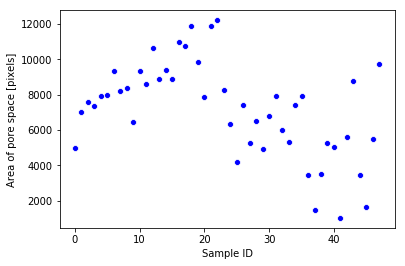

In [15]:
sns.scatterplot(x=rock_df.index, y="area", data=rock_df, color="blue")
plt.xlabel("Sample ID")
plt.ylabel("Area of pore space [pixels]")
plt.show()

[Text(0, 0.5, 'Area of pore space [pixels]')]

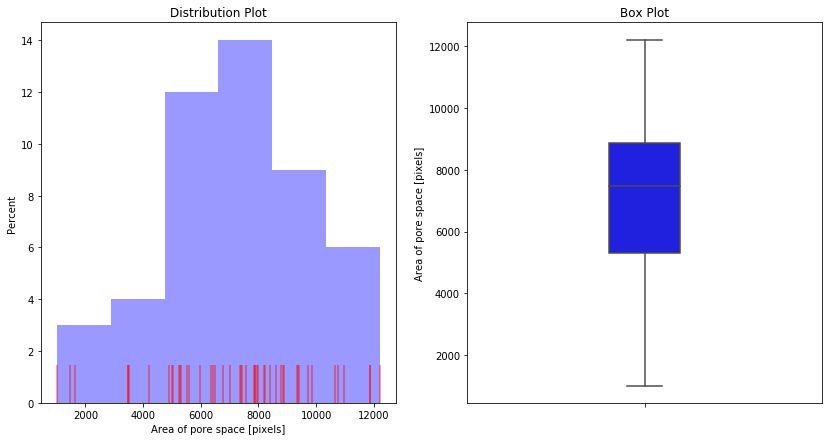

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

sns.distplot(rock_df['area'], kde=False, color="blue", rug=True, ax=axs[0], rug_kws={"color": "r", "alpha":0.5, "linewidth": 1.5, "height":0.1})
axs[0].set_title('Distribution Plot')
axs[0].set(xlabel='Area of pore space [pixels]', ylabel='Percent')

sns.boxplot(y="area", data=rock_df, ax=axs[1], color='blue', width=0.2)
axs[1].set_title('Box Plot')
axs[1].set(ylabel='Area of pore space [pixels]')

## Feature: Perimeter

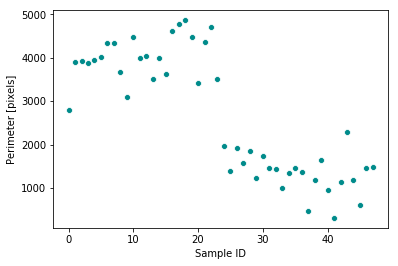

In [17]:
sns.scatterplot(x=rock_df.index, y="peri", data=rock_df, color="darkcyan")
plt.xlabel("Sample ID")
plt.ylabel("Perimeter [pixels]")
plt.show()

[Text(0, 0.5, 'Perimeter [pixels]')]

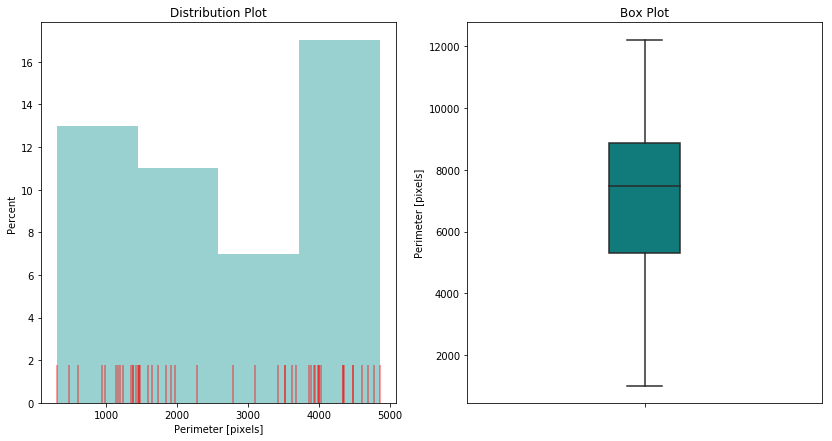

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

sns.distplot(rock_df['peri'], kde=False, color='darkcyan', rug=True, ax=axs[0], rug_kws={"color": "r", "alpha":0.5, "linewidth": 1.5, "height":0.1})
axs[0].set_title('Distribution Plot')
axs[0].set(xlabel='Perimeter [pixels]', ylabel='Percent')

sns.boxplot(y="area", data=rock_df, ax=axs[1], color='darkcyan', width=0.2)
axs[1].set_title('Box Plot')
axs[1].set(ylabel='Perimeter [pixels]')

## Feature: Shape

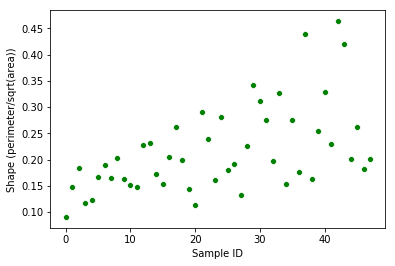

In [19]:
sns.scatterplot(x=rock_df.index, y="shape", data=rock_df, color='green')
plt.xlabel("Sample ID")
plt.ylabel("Shape (perimeter/sqrt(area))")
plt.show()

[Text(0, 0.5, 'Shape (perimeter/sqrt(area))')]

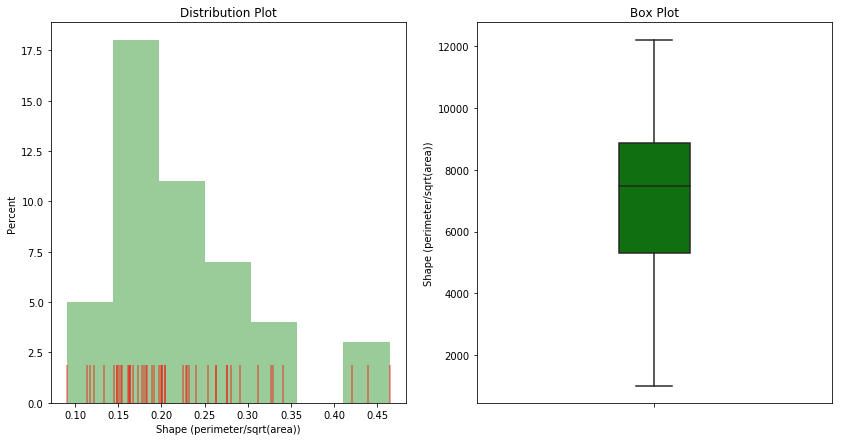

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

sns.distplot(rock_df['shape'], kde=False, color='green', rug=True, ax=axs[0], rug_kws={"color": "r", "alpha":0.5, "linewidth": 1.5, "height":0.1})
axs[0].set_title('Distribution Plot')
axs[0].set(xlabel='Shape (perimeter/sqrt(area))', ylabel='Percent')

sns.boxplot(y="area", data=rock_df, ax=axs[1], color='green', width=0.2)
axs[1].set_title('Box Plot')
axs[1].set(ylabel='Shape (perimeter/sqrt(area))')

## Target: Permeability

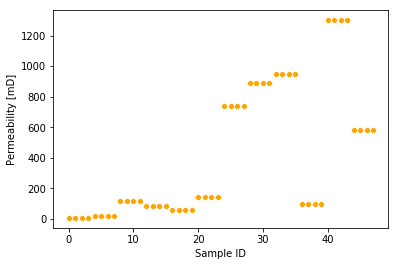

In [21]:
sns.scatterplot(x=rock_df.index, y="perm", data=rock_df, color="orange")
plt.xlabel("Sample ID")
plt.ylabel("Permeability [mD]")
plt.show()

The Permeability values of the four cross sections are very similar to each other.

[Text(0, 0.5, 'Permeability [mD]')]

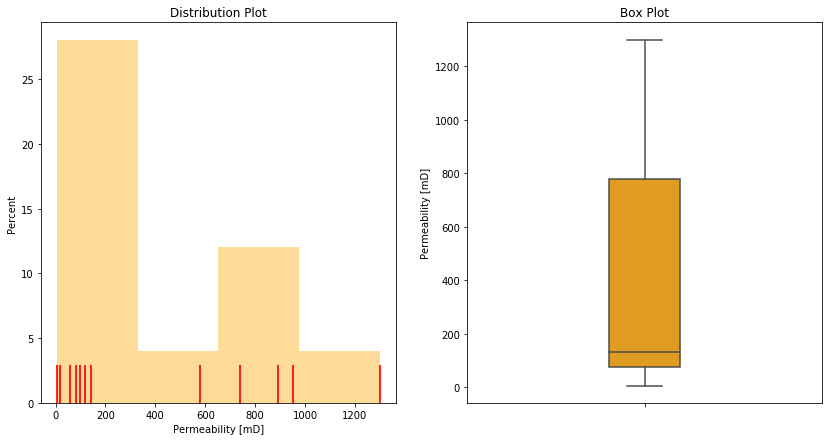

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

sns.distplot(rock_df['perm'], kde=False, color='orange', rug=True, ax=axs[0], rug_kws={"color": "r", "alpha":0.5, "linewidth": 1.5, "height":0.1 })
axs[0].set_title('Distribution Plot')
axs[0].set(xlabel='Permeability [mD]', ylabel='Percent')

sns.boxplot(y="perm", data=rock_df, ax=axs[1], color='orange', width=0.2)
axs[1].set_title('Box Plot')
axs[1].set(ylabel='Permeability [mD]')

Most of the reservoir samples have lower permeability. Permeability per core does not vary greatly.

## Correlations between features

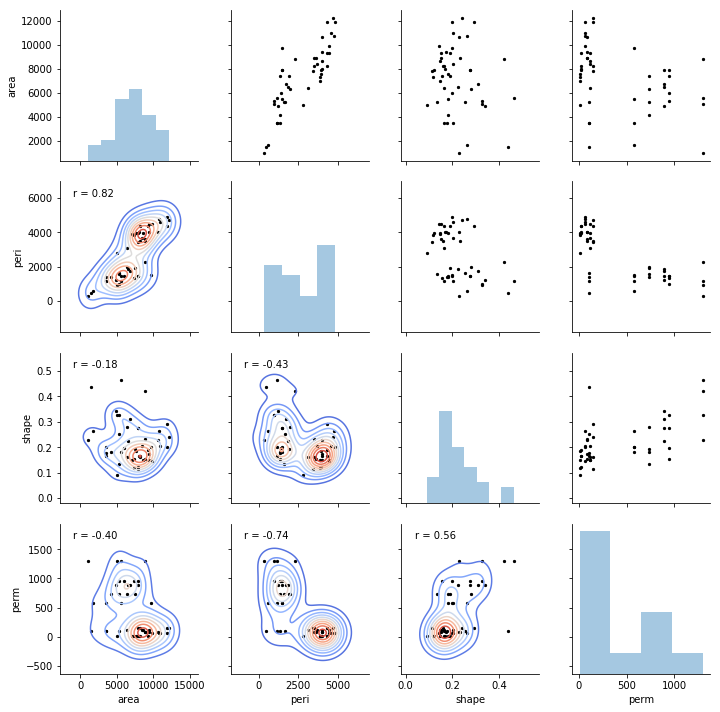

In [23]:
from scipy import stats

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

g = sns.PairGrid(rock_df, palette=["red"])
g.map_upper(plt.scatter, s=5, color="black")
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="coolwarm")
g.map_lower(corrfunc)
g.map_lower(plt.scatter, s=5, color="black")

Remarkable correlations:
- Area of pore space correlates positively with Perimeter. (r = 0.82)
- Perimeter correlates negatively with Permeability. (r = =0.74)


## Preprocessing Shuffling

The four core samples with very similar Permeability values were always recorded together. We want them as randomly distributed across the data set as possible. Often this step can be done included in an algorithem, too.

In [24]:
from sklearn.utils import shuffle
import numpy as np

seed = 0
np.random.seed(seed)

rock_df = shuffle(rock_df, random_state=seed)
rock_df.head() # not that the index values are not in order anymore

,area,peri,shape,perm
29,4895,1239.66,0.341273,890.0
4,7943,3948.54,0.122417,17.1
26,7416,1916.24,0.191802,740.0
30,6775,1728.14,0.311646,890.0
32,5980,1426.76,0.197653,950.0


## Preprocessing: Splitting in Features and Target

 Since the data set contains only 12 different permeability values, we are going to train the model using a fold cross-validation and score it on the whole dataset. **No traditional Train - CrossValidation - Test splitting**.

In [25]:
# split features and label into X (features) and y (target/label)

X = rock_df.drop('perm', axis=1)
X.reset_index(drop=True, inplace=True)
X_orig = X # for stuff later
X.head()

,area,peri,shape
0,4895,1239.66,0.341273
1,7943,3948.54,0.122417
2,7416,1916.24,0.191802
3,6775,1728.14,0.311646
4,5980,1426.76,0.197653


In [26]:
y = rock_df.drop(['area','peri','shape'], axis=1)
y.reset_index(drop=True, inplace=True)
y_orig = y # for graphs later
y.head()

,perm
0,890.0
1,17.1
2,740.0
3,890.0
4,950.0


## Preprocessing: Scaling

As seen in the graphs above, Permeability and Area have a much greater range of values than Shape and Perimeter. It will be beneficial to scale all features to a similar range.

X and y need to be scaled separately for the later inversion of the prediction.

In [27]:
from sklearn.preprocessing import StandardScaler

# scaling of x features
scalerx = StandardScaler() # define scaler type
scaled_X = scalerx.fit_transform(X)  # perform scaling, output is an array
scaled_X = pd.DataFrame(scaled_X, columns=['area','peri','shape']) # create a new data frame with the scaled values
X = scaled_X # copy the scaled data frame into the old data frame

X.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,area,peri,shape
0,-0.863309,-1.018270,1.490673
1,0.284391,0.893877,-1.158206
2,0.085954,-0.540685,-0.318419
3,-0.155410,-0.673461,1.132089
4,-0.454761,-0.886200,-0.247602


In [28]:
# scaling of y labels
scalery = StandardScaler() # define scaler type
scaled_y = scalery.fit_transform(y)  # perform scaling, output is an array
scaled_y = pd.DataFrame(scaled_y, columns=['scaled_perm']) # create a new data frame with the scaled values

# for prediction we can inverse the scaling: perm -> scaled_perm -> inverse_perm = perm. This function is used later on for y_hat
inverse_y = pd.DataFrame(scalery.inverse_transform(scaled_y), columns=['inverse_perm'])
compy_df = pd.concat([y, scaled_y, inverse_y], axis=1)
compy_df.head()

,perm,scaled_perm,inverse_perm
0,890.0,1.095367,890.0
1,17.1,-0.919481,17.1
2,740.0,0.749134,740.0
3,890.0,1.095367,890.0
4,950.0,1.233861,950.0


In [29]:
y = scaled_y # rename for ease of use

[Text(0, 0.5, 'Scaled Shape'), Text(0.5, 0, 'Sample ID')]

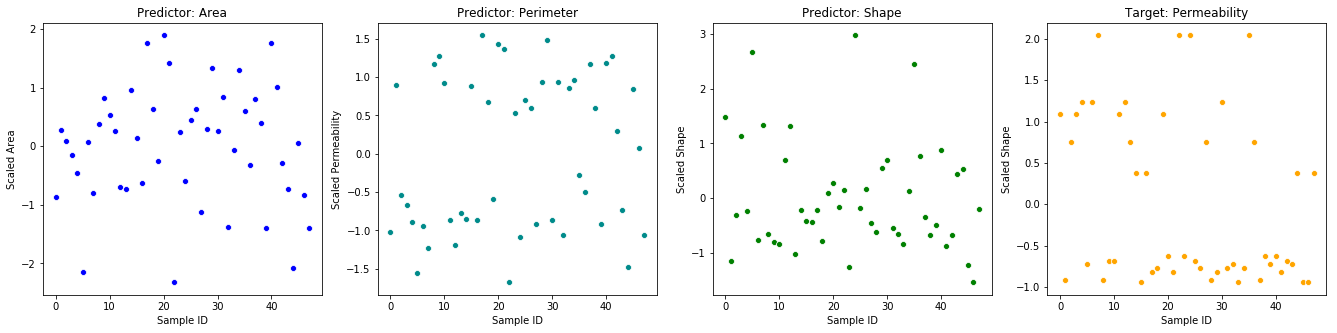

In [30]:
fig, axs = plt.subplots(1, 4, figsize=(23, 5))

sns.scatterplot(x=X.index, y="area", data=X, color='blue', ax=axs[0])
axs[0].set_title('Predictor: Area')
axs[0].set(xlabel='Sample ID', ylabel='Scaled Area')

sns.scatterplot(x=X.index, y="peri", data=X, color='darkcyan',ax=axs[1])
axs[1].set_title('Predictor: Perimeter')
axs[1].set(xlabel='Sample ID', ylabel='Scaled Permeability')

sns.scatterplot(x=X.index, y="shape", data=X, color='green', ax=axs[2])
axs[2].set_title('Predictor: Shape')
axs[2].set(xlabel='Sample ID', ylabel='Scaled Shape')

sns.scatterplot(x=y.index, y="scaled_perm", data=y, color='orange', ax=axs[3])
axs[3].set_title('Target: Permeability')
axs[3].set(xlabel='Sample ID', ylabel='Scaled Shape')

## Part I:  Machine Learning Models

The following regression models for continuous data are implemented with a brief loop for a grid search for best cross validation (folds) and a few other algorithm specific parameters. The second cell re-runs the algorithm with the best scores from the previous search.

Before getting started we define some variables used for all ML models:

In [31]:
max_CV = 10 # maximum cross validation folds evaluated

## Support Vector Regression (SVR)

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

SVRScore_df = pd.DataFrame(columns=['CV','C','mean_score'])

C_selection = [1, 10, 100, 1000] # some typical values

for C in C_selection:
    for i in range(2,max_CV):
        clf = SVR(kernel='linear', C=C)
        scores = cross_val_score(clf, X, y.values.ravel(), cv=i)
        SVRScore_df = SVRScore_df.append({'CV' : i, 'C' : C, 'mean_score' : scores.mean()}, ignore_index=True)

SVRScore_df = SVRScore_df.sort_values(by=['mean_score'], ascending=False).head()
SVRScore_df = SVRScore_df.round({'mean_score': 3})
SVRScore_df

,CV,C,mean_score
8,2.0,10.0,0.525
24,2.0,1000.0,0.518
16,2.0,100.0,0.518
0,2.0,1.0,0.466
25,3.0,1000.0,0.433


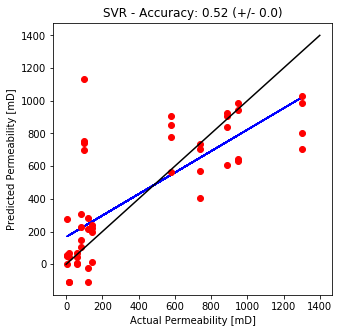

In [33]:
best_cv = int(SVRScore_df.iloc[0,0])
best_C = int(SVRScore_df.iloc[0,1])

clf = SVR(kernel='linear', C=best_C)
scores = cross_val_score(clf, X, y.values.ravel(), cv=best_cv)
score_str = "Accuracy: {} (+/- {})".format(round(scores.mean(),2), round(scores.std() * 2),2)

y_hat = cross_val_predict(clf, X, y.values.ravel(), cv=best_cv)
y_hat = scalery.inverse_transform(y_hat)

# regression predection vs actual
linearRegressor = LinearRegression()
linearRegressor.fit(y_orig, y_hat)
ygraph_pred = linearRegressor.predict(y_orig)

plt.figure(figsize=(5,5))
plt.plot(y_orig, ygraph_pred, color = 'blue')
plt.plot(y_orig, y_hat, 'ro')
plt.plot([0, 1400], [0, 1400], 'k-')
plt.title('SVR - {}'.format(score_str))
plt.xlabel('Actual Permeability [mD]')
plt.ylabel('Predicted Permeability [mD]')
plt.show()

## Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

LinearScore_df = pd.DataFrame(columns=['CV','mean_score'])

for i in range(2,max_CV):
    clf = LinearRegression()
    scores = cross_val_score(clf, X, y, cv=i)
    LinearScore_df = LinearScore_df.append({'CV' : i, 'mean_score' : scores.mean()}, ignore_index=True)

LinearScore_df = LinearScore_df.sort_values(by=['mean_score'], ascending=False).head()
LinearScore_df = LinearScore_df.round({'mean_score': 3})
LinearScore_df

,CV,mean_score
6,8.0,0.401
0,2.0,0.392
1,3.0,0.387
2,4.0,0.354
4,6.0,0.352


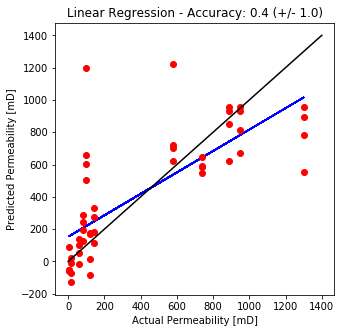

In [35]:
best_cv = int(LinearScore_df.iloc[0,0])

clf = LinearRegression()
scores = cross_val_score(clf, X, y, cv=best_cv)
score_str = "Accuracy: {} (+/- {})".format(round(scores.mean(),2), round(scores.std() * 2),2)

y_hat = cross_val_predict(clf, X, y, cv=best_cv)
y_hat = scalery.inverse_transform(y_hat)

# plot regression predection vs actual
linearRegressor = LinearRegression()
linearRegressor.fit(y_orig, y_hat)
ygraph_pred = linearRegressor.predict(y_orig)

plt.figure(figsize=(5,5))
plt.plot(y_orig, ygraph_pred, color = 'blue')
plt.plot(y_orig, y_hat, 'ro')
plt.plot([0, 1400], [0, 1400], 'k-')
plt.title('Linear Regression - {}'.format(score_str))
plt.xlabel('Actual Permeability [mD]')
plt.ylabel('Predicted Permeability [mD]')
plt.show()

## Decision Tree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor

TreeScore_df = pd.DataFrame(columns=['CV','max_depth','mean_score'])
maxmax_depth = 10

for max_depth in range(1,maxmax_depth+1):
    for i in range(2,max_CV):
        clf = DecisionTreeRegressor(max_depth=max_depth,random_state=seed)
        scores = cross_val_score(clf, X, y, cv=i)
        TreeScore_df = TreeScore_df.append({'CV' : i,'max_depth' : max_depth, 'mean_score' : scores.mean()}, ignore_index=True)

TreeScore_df = TreeScore_df.sort_values(by=['mean_score'], ascending=False).head()
TreeScore_df = TreeScore_df.round({'mean_score': 3})
TreeScore_df

,CV,max_depth,mean_score
1,3.0,1.0,0.428
9,3.0,2.0,0.271
6,8.0,1.0,0.159
5,7.0,1.0,0.152
4,6.0,1.0,0.145


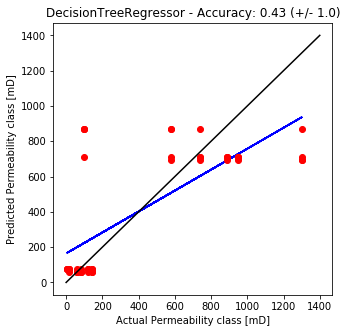

In [37]:
best_cv = int(TreeScore_df.iloc[0,0])
best_max_depth = int(TreeScore_df.iloc[0,1])

clf = DecisionTreeRegressor(max_depth=best_max_depth,random_state=seed)
scores = cross_val_score(clf, X, y, cv=best_cv)
score_str = "Accuracy: {} (+/- {})".format(round(scores.mean(),2), round(scores.std() * 2),2)

y_hat = cross_val_predict(clf, X, y, cv=best_cv)
y_hat = scalery.inverse_transform(y_hat)

# regression predection vs actual
linearRegressor = LinearRegression()
linearRegressor.fit(y_orig, y_hat)
ygraph_pred = linearRegressor.predict(y_orig)

plt.figure(figsize=(5,5))
plt.plot(y_orig, ygraph_pred, color = 'blue')
plt.plot(y_orig, y_hat, 'ro')
plt.plot([0, 1400], [0, 1400], 'k-')
plt.title('DecisionTreeRegressor - {}'.format(score_str))
plt.xlabel('Actual Permeability class [mD]')
plt.ylabel('Predicted Permeability class [mD]')
plt.show()

## Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor

ForestScore_df = pd.DataFrame(columns=['CV','estimators','mean_score'])
max_estimators = 10

for estimator in range(1,max_estimators+1):
    for i in range(2,max_CV):
        clf = RandomForestRegressor(n_estimators=estimator, random_state=seed)
        scores = cross_val_score(clf, X, y.values.ravel(), cv=i)
        ForestScore_df = ForestScore_df.append({'CV' : i, 'estimators': estimator, 'mean_score' : scores.mean()}, ignore_index=True)

ForestScore_df = ForestScore_df.sort_values(by=['mean_score'], ascending=False).head()
ForestScore_df = ForestScore_df.round({'mean_score': 3})
ForestScore_df

,CV,estimators,mean_score
42,4.0,6.0,0.262
50,4.0,7.0,0.248
62,8.0,8.0,0.223
25,3.0,4.0,0.216
70,8.0,9.0,0.214


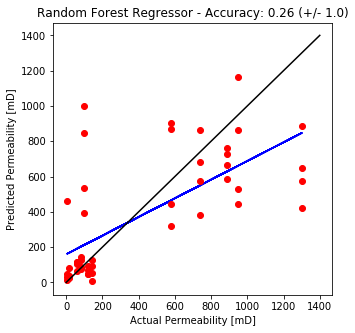

In [39]:
best_cv = int(ForestScore_df.iloc[0,0])
best_estimators = int(ForestScore_df.iloc[0,1])

clf = RandomForestRegressor(n_estimators=best_estimators, random_state=seed)
scores = cross_val_score(clf, X, y.values.ravel(), cv=best_cv,)
score_str = "Accuracy: {} (+/- {})".format(round(scores.mean(),2), round(scores.std() * 2),2)

y_hat = cross_val_predict(clf, X, y.values.ravel(), cv=best_cv)
y_hat = scalery.inverse_transform(y_hat)

# regression predection vs actual
linearRegressor = LinearRegression()
linearRegressor.fit(y_orig, y_hat)
ygraph_pred = linearRegressor.predict(y_orig)

plt.figure(figsize=(5,5))
plt.plot(y_orig, ygraph_pred, color = 'blue')
plt.plot(y_orig, y_hat, 'ro')
plt.plot([0, 1400], [0, 1400], 'k-')
plt.title('Random Forest Regressor - {}'.format(score_str))
plt.xlabel('Actual Permeability [mD]')
plt.ylabel('Predicted Permeability [mD]')
plt.show()

## K-Nearest Neighbors Regression (KNN Regressor)

In [40]:
from sklearn.neighbors import KNeighborsRegressor

KNNscore_df = pd.DataFrame(columns=['CV','K','mean_score'])
max_K = 10

for K in range(max_K):
    K = K+1
    for i in range(2,max_CV):
        clf = KNeighborsRegressor(n_neighbors=K)
        scores = cross_val_score(clf, X, y, cv=i)
        KNNscore_df = KNNscore_df.append({'CV' : i, 'K': K, 'mean_score' : scores.mean()}, ignore_index=True)
        i = i+1

KNNscore_df = KNNscore_df.sort_values(by=['mean_score'], ascending=False).head()
KNNscore_df = KNNscore_df.round({'mean_score': 3})
KNNscore_df

,CV,K,mean_score
54,8.0,7.0,0.419
62,8.0,8.0,0.418
30,8.0,4.0,0.409
18,4.0,3.0,0.409
53,7.0,7.0,0.396


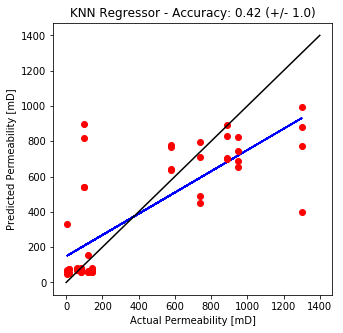

In [41]:
best_cv = int(KNNscore_df.iloc[0,0])
best_K = int(KNNscore_df.iloc[0,1])

clf = KNeighborsRegressor(n_neighbors=best_K)
scores = cross_val_score(clf, X, y, cv=best_cv)

score_str = "Accuracy: {} (+/- {})".format(round(scores.mean(),2), round(scores.std() * 2),2)

y_hat = cross_val_predict(clf, X, y, cv=best_cv)
y_hat = scalery.inverse_transform(y_hat)

# regression predection vs actual
linearRegressor = LinearRegression()
linearRegressor.fit(y_orig, y_hat)
ygraph_pred = linearRegressor.predict(y_orig)

plt.figure(figsize=(5,5))
plt.plot(y_orig, ygraph_pred, color = 'blue')
plt.plot(y_orig, y_hat, 'ro')
plt.plot([0, 1400], [0, 1400], 'k-')
plt.title('KNN Regressor - {}'.format(score_str))
plt.xlabel('Actual Permeability [mD]')
plt.ylabel('Predicted Permeability [mD]')
plt.show()

## Gradient Boosting Regressor

In [42]:
from sklearn import ensemble

GradientBoostingScore_df = pd.DataFrame(columns=['CV','mean_score'])

for i in range(2,max_CV):
    clf = ensemble.GradientBoostingRegressor(random_state=seed)
    scores = cross_val_score(clf, X, y.values.ravel(), cv=i)
    GradientBoostingScore_df = GradientBoostingScore_df.append({'CV' : i, 'mean_score' : scores.mean()}, ignore_index=True)

GradientBoostingScore_df = GradientBoostingScore_df.sort_values(by=['mean_score'], ascending=False).head()
GradientBoostingScore_df = GradientBoostingScore_df.round({'mean_score': 3})
GradientBoostingScore_df

,CV,mean_score
1,3.0,0.242
2,4.0,0.014
5,7.0,-0.091
3,5.0,-0.103
6,8.0,-0.107


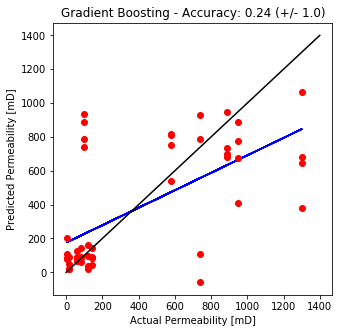

In [43]:
best_cv = int(GradientBoostingScore_df.iloc[0,0])

clf = ensemble.GradientBoostingRegressor(random_state=seed)
scores = cross_val_score(clf, X, y.values.ravel(), cv=best_cv)
score_str = "Accuracy: {} (+/- {})".format(round(scores.mean(),2), round(scores.std() * 2),2)
y_hat = cross_val_predict(clf, X, y.values.ravel(), cv=best_cv)
y_hat = scalery.inverse_transform(y_hat)

# regression predection vs actual
linearRegressor = LinearRegression()
linearRegressor.fit(y_orig, y_hat)
ygraph_pred = linearRegressor.predict(y_orig)

plt.figure(figsize=(5,5))
plt.plot(y_orig, ygraph_pred, color = 'blue')
plt.plot(y_orig, y_hat, 'ro')
plt.plot([0, 1400], [0, 1400], 'k-')
plt.title('Gradient Boosting - {}'.format(score_str))
plt.xlabel('Actual Permeability [mD]')
plt.ylabel('Predicted Permeability [mD]')
plt.show()

## Conclusion

This data set is very small and only twelve samples are available.

The Support Vector Regressor with linear kernel yields the highest score. With additional parameter tweaking all scores may still improve a bit.

In [44]:
data = {'Algorithm': ['Support Vector Regression', 'Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'K-Nearest Neighbor Regressor', 'Gradient Boosting Regressor'],
        'mean_score':[SVRScore_df.iloc[0].at['mean_score'], LinearScore_df.iloc[0].at['mean_score'], TreeScore_df.iloc[0].at['mean_score'], ForestScore_df.iloc[0].at['mean_score'], KNNscore_df.iloc[0].at['mean_score'], GradientBoostingScore_df.iloc[0].at['mean_score']]}

df_comp = pd.DataFrame(data)
df_comp.sort_values(by=['mean_score'], inplace=True, ascending=False)
df_comp.index = np.arange(1,len(df_comp)+1)

df_comp

,Algorithm,mean_score
1,Support Vector Regression,0.525
2,Decision Tree Regressor,0.428
3,K-Nearest Neighbor Regressor,0.419
4,Linear Regression,0.401
5,Random Forest Regressor,0.262
6,Gradient Boosting Regressor,0.242


## Part II: Neural Network

It is well accepted that Neural Networks perform better with larger amount of data compared to other ML techniques.
Anzway, let's try it out.

In [45]:
from sklearn.model_selection import KFold
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from datetime import datetime

## Model with single hidden layer and droput

KFold(n_splits=4, random_state=0, shuffle=False)
Fold 1 starting...
Fold 1 mean_squared_error: 13.65. Time elapsed (hh:mm:ss:ms): 0:00:08.100050. Save path: keras_regr_rockperm_model.Fold1.mean_squared_error13.65.h5
Fold 2 starting...
Fold 2 mean_squared_error: 11.08. Time elapsed (hh:mm:ss:ms): 0:00:07.903982. Save path: keras_regr_rockperm_model.Fold2.mean_squared_error11.08.h5
Fold 3 starting...
Fold 3 mean_squared_error: 15.5. Time elapsed (hh:mm:ss:ms): 0:00:07.754055. Save path: keras_regr_rockperm_model.Fold3.mean_squared_error15.5.h5
Fold 4 starting...
Fold 4 mean_squared_error: 20.29. Time elapsed (hh:mm:ss:ms): 0:00:07.849295. Save path: keras_regr_rockperm_model.Fold4.mean_squared_error20.29.h5
Cross validated MSE 15.13 (+/-3.37). Time elapsed (hh:mm:ss.ms): 0:00:31.832857)


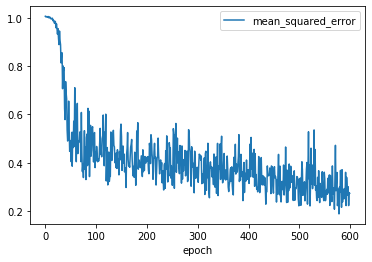

In [45]:
kfold = KFold(n_splits=4, shuffle=False, random_state=seed)
kfold.get_n_splits(X, y)
cvscores = []
foldcounter=1
print(kfold)
# start overall timer
start_time = datetime.now()

for i  in kfold.split(X):
    
    # start fold timer
    start_time_fold = datetime.now()
    print("Fold {} starting...".format(foldcounter))
    
    # design model
    model = Sequential()
    model.add(Dense(24, input_dim=3, activation='relu', kernel_initializer='normal'))
    model.add(Dense(12, activation='relu', kernel_initializer='normal'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='linear', kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mse'])
    
    # run model
    history = model.fit(X, y, epochs=600, batch_size=3, verbose=0)
    
    # stop fold timer
    time_elapsed_fold = datetime.now() - start_time_fold 
    
    # score model
    scores = model.evaluate(X, y, verbose=0)
    
    # save model fold
    save_path = "keras_regr_rockperm_model.Fold%s.%s%s.h5" % (foldcounter ,model.metrics_names[1], round(scores[1]*100,2))
    model.save(save_path)
    
    # print stuff about fold
    print("Fold {} {}: {}. Time elapsed (hh:mm:ss:ms): {}. Save path: {}".format(foldcounter, model.metrics_names[1], round(scores[1]*100,2), time_elapsed_fold, save_path))
    
    # append current fold scores to cvscores       
    cvscores.append(scores[1] * 100)
    
    # increase fold counter
    foldcounter = foldcounter+1

# print CrossValidation score and stop overall timer
time_elapsed = datetime.now() - start_time 
print("Cross validated MSE {} (+/-{}). Time elapsed (hh:mm:ss.ms): {})".format(round(np.mean(cvscores),2), round(np.std(cvscores),2),time_elapsed)) 

# learning curve of the last fold
# learning curve of the last fold
plt.plot(history.history['mean_squared_error'])
plt.legend(['mean_squared_error'], loc='upper right')
plt.xlabel('epoch')
plt.show()

## Load up one of the saved models

I had to cheat a little here. I ran the model on my personal computer on Keras with GPU and uploaded the model files to Object Storage. The runtime was about 100x faster compared to the Watson Studio free tier.

In [54]:
# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_2 = client_.get_object(Bucket='adv-data-sci-cap-rock', Key='keras_regr_rockperm_model.Fold3.mean_squared_error15.5.h5')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_2, "__iter__"): streaming_body_2.__iter__ = types.MethodType( __iter__, streaming_body_2 )

In [55]:
# Save model file from IBM Object Storage connected to local filesystem
f = open('keras_regr_rockperm_model.Fold3.mean_squared_error15.5.h5', 'wb')
f.write(streaming_body_2.read())
# Load model
model = load_model('keras_regr_rockperm_model.Fold3.mean_squared_error15.5.h5')

In [56]:
# Model output shape
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 24)                96        
_________________________________________________________________
dense_8 (Dense)              (None, 12)                300       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 13        
Total params: 409
Trainable params: 409
Non-trainable params: 0
_________________________________________________________________


## Compare actual permeability with model

In [57]:
y_hat = model.predict(X)
y_hat = scalery.inverse_transform(y_hat)
y_hat = np.around(y_hat,decimals=0)

# show values actual vs prediction
comparison = np.column_stack((y_orig, y_hat))
print(comparison[:15])

[[ 890.   650. ]
 [  17.1  119. ]
 [ 740.   580. ]
 [ 890.   812. ]
 [ 950.   755. ]
 [ 100.   282. ]
 [ 950.   796. ]
 [1300.   866. ]
 [  17.1   85. ]
 [ 119.   115. ]
 [ 119.   146. ]
 [ 890.   862. ]
 [ 950.   897. ]
 [ 740.   476. ]
 [ 580.   614. ]]


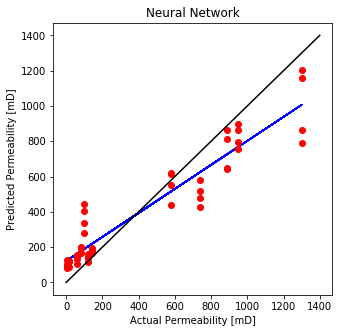

In [58]:
# regression actual vs prediction
linearRegressor = LinearRegression()
linearRegressor.fit(y_orig, y_hat)
ygraph_pred = linearRegressor.predict(y_orig)

# plot actual vs prediction
plt.figure(figsize=(5,5))
plt.plot(y_orig, ygraph_pred, color = 'blue')
plt.plot(y_orig, y_hat, 'ro')
plt.plot([0, 1400], [0, 1400], 'k-')
plt.title('Neural Network')
plt.xlabel('Actual Permeability [mD]')
plt.ylabel('Predicted Permeability [mD]')
plt.show()

## Make Predictions

Here comes the business end. Making predictions. Our dataset had Permeability from 6 to 1300 mD.

### Make predictions with given feature values

In [59]:
# make predictions for a random value of our X set
import random

# convert the pandas df to a list
X_score_1 = X_orig.values.tolist()
y_score_1 = y_orig.values.tolist()

# select a random set of measurements from the data set
rand_row = random.randint(1,len(X_orig)) # create a random row number
X_score_1 = X_score_1[rand_row] # the input for prediction
X_score_1 = np.array([X_score_1])
X_score_1_scaled = scalerx.transform(X_score_1) # the input values need to be scaled before making a prediction
y_score_1 = y_score_1[rand_row] # the correct answer

# make a prediction for permeability
y_hat_1 = model.predict(X_score_1_scaled)
y_hat_1 = scalery.inverse_transform(y_hat_1) # the predicted value needs to be inversed
print("Given parameters: \nArea: {}\nPerimeter: {}\nShape: {}\n\nPredicted Permeability: {} mD\nPermeability shoud be: {} mD".format(X_score_1[0,0], round(X_score_1[0,1],2), round(X_score_1[0,2],2), round(float(y_hat_1),2), y_score_1[0]))

Given parameters: 
Area: 12212.0
Perimeter: 4697.65
Shape: 0.24

Predicted Permeability: 176.57 mD
Permeability shoud be: 142.0 mD


### Make predictions with custom values

In [60]:
# define custom values for area, peri, shape. The entered values should yield something around 1300 mD
my_area = 8800  # enter value that ranges from 1000 to 12000
my_peri = 2200  # enter value that ranges from 300 to 4800
my_shape = 0.42  # enter value ranges from 0.09 to 0.46
X_score_2 = np.array([[my_area, my_peri, my_shape]])
X_score_2_scaled = scalerx.transform(X_score_2) # the input values need to be transformed before making a prediction

# make a prediction for permeability
y_hat_2 = model.predict(X_score_2_scaled)
y_hat_2 = scalery.inverse_transform(y_hat_2) # the predicted value needs to be inversed
print("Given parameters: \nArea: {}\nPerimeter: {}\nShape: {}\n\nPredicted Permeability: {} mD".format(my_area, my_peri, my_shape, round(float(y_hat_2),2)))

Given parameters: 
Area: 8800
Perimeter: 2200
Shape: 0.42

Predicted Permeability: 1216.96 mD


## Model deployment to IBM Cloud

Make a tarball for uploading

In [61]:
# Create tarball for uploading
!tar -zcvf keras_regr_rockperm_best_model.tgz keras_regr_rockperm_model.Fold3.mean_squared_error15.5.h5

keras_regr_rockperm_model.Fold3.mean_squared_error15.5.h5


In [62]:
# paste Watson Machine Learning credentials
wml_credentials={
  "apikey": "TZpEGI5LHgBvxgtcUqJ2q8ryUC2W0Iw3zina5W3qVPlb",
  "iam_apikey_description": "Auto generated apikey during resource-key operation for Instance - crn:v1:bluemix:public:pm-20:us-south:a/aeadb3ecdefc4c7bbf2bf332d6d6f539:5fd51159-e6d4-4eab-b3bc-c07612a32a09::",
  "iam_apikey_name": "auto-generated-apikey-e32495ce-5da7-40df-a209-f8de1af9d6c5",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/aeadb3ecdefc4c7bbf2bf332d6d6f539::serviceid:ServiceId-a33fe603-fd38-46d4-8ea2-58caf3b1e346",
  "instance_id": "5fd51159-e6d4-4eab-b3bc-c07612a32a09",
  "url": "https://us-south.ml.cloud.ibm.com"
}

In [63]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

# feed the credentials to Watson Machine Learning API
client = WatsonMachineLearningAPIClient(wml_credentials)

In [64]:
# give our model a description
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Christian Haller",
               client.repository.ModelMetaNames.NAME: "Rock Permeability Regression NN",
               client.repository.ModelMetaNames.FRAMEWORK_NAME: "tensorflow",
               client.repository.ModelMetaNames.FRAMEWORK_VERSION: "1.5" ,
               client.repository.ModelMetaNames.FRAMEWORK_LIBRARIES: [{"name": "keras", "version": "2.1.3"}]
              }

In [65]:
published_model = client.repository.store_model(model="keras_regr_rockperm_best_model.tgz", meta_props=model_props)

In [66]:
published_model_uid = client.repository.get_model_uid(published_model)
model_details = client.repository.get_details(published_model_uid)

In [67]:
# check what models are on Watson ML
client.deployments.list()

------------------------------------  ---------------------------------------  ------  --------------  ------------------------  ---------  -------------
GUID                                  NAME                                     TYPE    STATE           CREATED                   FRAMEWORK  ARTIFACT TYPE
5e624a61-1c24-451c-a4e7-e3837b72b024  Device Event Scoring - Batch Prediction  batch   COMPLETED       2019-03-12T20:00:26.210Z  wml-1.1    model
6bcef3f1-9f71-44a8-85fb-7b858518a161  Device Event Scoring - Web Service       online  DEPLOY_SUCCESS  2019-03-12T19:36:05.099Z  wml-1.1    model
------------------------------------  ---------------------------------------  ------  --------------  ------------------------  ---------  -------------


In [82]:
created_deployment = client.deployments.create(published_model_uid, name="Rock Permeability Prediction")



#######################################################################################

Synchronous deployment creation for uid: 'd91815db-9e1c-4354-93c7-1297fc80154f' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='1e16e0f1-69f1-4ebd-9b7c-ecb853027560'
------------------------------------------------------------------------------------------------




In [83]:
# check again
client.deployments.list()

------------------------------------  ---------------------------------------  ------  --------------  ------------------------  --------------  -------------
GUID                                  NAME                                     TYPE    STATE           CREATED                   FRAMEWORK       ARTIFACT TYPE
1e16e0f1-69f1-4ebd-9b7c-ecb853027560  Rock Permeability Prediction             online  DEPLOY_SUCCESS  2019-09-01T21:03:06.186Z  tensorflow-1.5  model
5e624a61-1c24-451c-a4e7-e3837b72b024  Device Event Scoring - Batch Prediction  batch   COMPLETED       2019-03-12T20:00:26.210Z  wml-1.1         model
6bcef3f1-9f71-44a8-85fb-7b858518a161  Device Event Scoring - Web Service       online  DEPLOY_SUCCESS  2019-03-12T19:36:05.099Z  wml-1.1         model
------------------------------------  ---------------------------------------  ------  --------------  ------------------------  --------------  -------------


## Make predictions on IBM Cloud

We can feed the same random-row parameters from above into Watson ML.

In [84]:
#scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
scoring_endpoint = created_deployment['entity']['scoring_url']
print(scoring_endpoint)

https://us-south.ml.cloud.ibm.com/v3/wml_instances/5fd51159-e6d4-4eab-b3bc-c07612a32a09/deployments/1e16e0f1-69f1-4ebd-9b7c-ecb853027560/online


In [107]:
scoring_payload = {'values': [X_score_1_scaled[0]]} # use same random row features as above
y_hat_3 = client.deployments.score(scoring_endpoint, scoring_payload) # send it off
y_hat_3 = y_hat_3['values'][0][0] # pick the right value off the list
y_hat_3 = scalery.inverse_transform(y_hat_3) # inverse scaling

print("Given parameters: \nArea: {}\nPerimeter: {}\nShape: {}\n\nPredicted Permeability from IBM Watson ML: {} mD\nPermeability shoud be: {} mD".format(X_score_1[0,0], round(X_score_1[0,1],2), round(X_score_1[0,2],2), round(y_hat_3[0],2), y_score_1[0]))

Given parameters: 
Area: 12212.0
Perimeter: 4697.65
Shape: 0.24

Predicted Permeability from IBM Watson ML: 176.57 mD
Permeability shoud be: 142.0 mD
